In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow
import glob
from keras.models import load_model
from numpy.random import randint

In [2]:
input_folder = "Data"
i=0
for img in glob.glob(input_folder + "/*.tif"):
  image = cv2.imread(img)
  imgResized = cv2.resize(image, (128, 128))
  cv2.imwrite("hri.tif", imgResized)
  i += 1

In [3]:
input_folder = "Data"
i=0
for img in glob.glob(input_folder + "/*.tif"):
  image = cv2.imread(img)
  imgResized = cv2.resize(image, (32, 32))
  cv2.imwrite("lri.tif", imgResized)
  i += 1

1/1 [==============================] - 1s 1s/step


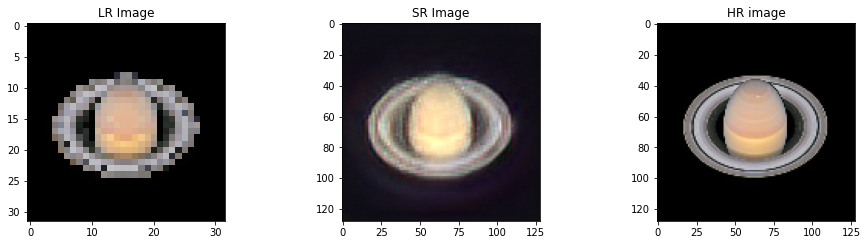

In [10]:
generator = load_model('/content/keras100.h5', compile=False)


lri = cv2.imread("/content/lri.tif")
hri = cv2.imread("/content/hri.tif")

lri = cv2.cvtColor(lri, cv2.COLOR_BGR2RGB)
hri = cv2.cvtColor(hri, cv2.COLOR_BGR2RGB)

lri = lri / 255.
hri = hri / 255.

lri = np.expand_dims(lri, axis=0)
hri = np.expand_dims(hri, axis=0)

sri = generator.predict(lri)

plt.figure(figsize=(16, 8))
plt.subplot(231)
plt.title('LR Image')
plt.imshow(lri[0,:,:,:])
plt.subplot(232)
plt.title('SR Image')
plt.imshow(sri[0,:,:,:])
plt.subplot(233)
plt.title('HR image')
plt.imshow(hri[0,:,:,:])

plt.show()


In [11]:
!pip install tensorflowjs 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 KB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 KB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 214.2/214.2 KB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 66.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.2/74.2 KB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.9/154.9 KB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 82.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.7/238.7 KB 25.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 57.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 KB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.9/87.9 KB 9.2 MB/s eta 0:00:00
  Attempting unins

In [12]:
!mkdir model
!tensorflowjs_converter --input_format keras keras100.h5 model/

2023-03-13 12:48:36.657716: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/lib/python3.9/dist-packages/cv2/../../lib64:/usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-03-13 12:48:36.657802: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/lib/python3.9/dist-packages/cv2/../../lib64:/usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-03-13 12:48:36.657818: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.


In [13]:
!zip -r model.zip model 

  adding: model/ (stored 0%)
  adding: model/group1-shard2of2.bin (deflated 7%)
  adding: model/group1-shard1of2.bin (deflated 8%)
  adding: model/model.json (deflated 96%)


In [14]:
from google.colab import files
files.download('model.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>